In [1]:
# Importing all necessary libraries
import numpy as np #Deals with matrix and arrays.
import pandas as pd
import math #Used for matheatical calculations on images.
import cv2 #Deals with mamnipulation of images
import matplotlib.pyplot as plt #For visualizing results
import os #Deal with operating system
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
from random import shuffle
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf #machine learning compiler
from keras.models import Sequential #For model and layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical

2021-08-26 11:17:16.628725: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-26 11:17:16.628807: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Fetching dataset classes
os.listdir('brain_tumor_dataset')

['yes', 'no']

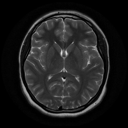

In [3]:
# Testing first image of first class
im =Image.open('brain_tumor_dataset/no/1 no.jpeg').resize((128,128))
im

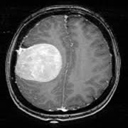

In [4]:
# Testing first image of tumor class
im =Image.open('brain_tumor_dataset/yes/Y1.jpg').resize((128,128))
im

In [5]:
# Storing both classes separately
yes=os.listdir('brain_tumor_dataset/yes')
no=os.listdir('brain_tumor_dataset/no')

In [6]:
# Checking if all the images in the both classes are read or not
data=np.concatenate([yes,no])
len(data)==len(yes)+len(no)

True

In [7]:
# Checking length of both class against the full data length
target_x=np.full(len(yes),1)
target_y=np.full(len(no),0)
data_target=np.concatenate([target_x,target_y])
len(data_target)==len(target_x)+len(target_y)

True

In [8]:
len(data_target)==len(data)

True

In [9]:
data_target #Visualizing data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
data #Displaying all images

array(['Y252.jpg', 'Y109.JPG', 'Y78.jpg', 'Y2.jpg', 'Y253.JPG',
       'Y186.jpg', 'Y16.JPG', 'Y154.jpg', 'Y91.jpg', 'Y92.jpg', 'Y19.JPG',
       'Y247.JPG', 'Y112.JPG', 'Y90.jpg', 'Y60.jpg', 'Y184.JPG',
       'Y73.jpg', 'Y164.JPG', 'Y117.JPG', 'Y20.jpg', 'Y115.JPG',
       'Y40.JPG', 'Y66.JPG', 'Y21.jpg', 'Y26.jpg', 'Y258.JPG', 'Y102.jpg',
       'Y243.JPG', 'Y56.jpg', 'Y113.JPG', 'Y33.jpg', 'Y51.jpg', 'Y47.JPG',
       'Y24.jpg', 'Y82.jpg', 'Y157.JPG', 'Y159.JPG', 'Y256.JPG',
       'Y62.jpg', 'Y18.JPG', 'Y183.jpg', 'Y158.JPG', 'Y42.jpg', 'Y32.jpg',
       'Y31.jpg', 'Y74.jpg', 'Y106.jpg', 'Y96.jpg', 'Y245.jpg', 'Y34.jpg',
       'Y36.JPG', 'Y162.jpg', 'Y259.JPG', 'Y92.png', 'Y17.jpg', 'Y13.jpg',
       'Y116.JPG', 'Y29.jpg', 'Y166.JPG', 'Y114.JPG', 'Y98.JPG', 'Y7.jpg',
       'Y105.jpg', 'Y153.jpg', 'Y49.JPG', 'Y101.jpg', 'Y182.JPG',
       'Y167.JPG', 'Y103.jpg', 'Y120.JPG', 'Y23.JPG', 'Y195.JPG',
       'Y251.JPG', 'Y55.jpg', 'Y25.jpg', 'Y30.jpg', 'Y44.JPG', 'Y188.jpg',
       'Y

In [11]:
yes_values=os.listdir('brain_tumor_dataset/yes')
no_values=os.listdir('brain_tumor_dataset/no')

In [12]:
# Reading all the images from brain tumor class
X_data =[]
for file in yes_values:
    img = cv2.imread('brain_tumor_dataset/yes/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [13]:
# Reading all the images from no tumor class
for file in no_values:
    img = cv2.imread('brain_tumor_dataset/no/'+file)
    face = cv2.resize(img, (32, 32) )
    (b, g, r)=cv2.split(face) 
    img=cv2.merge([r,g,b])
    X_data.append(img)

In [14]:
len(X_data)==len(data)==len(data_target)

True

In [15]:
X = np.squeeze(X_data) #Resizing

In [16]:
X.shape #Reshaped data

(253, 32, 32, 3)

In [17]:
# normalize data
X = X.astype('float32')
X /= 255

In [18]:
categorical_labels = to_categorical(data_target, num_classes=2)

In [19]:
data_target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [20]:
# Separating training and testing data
(x_train, y_train), (x_test, y_test) = (X[:190],data_target[:190]) , (X[190:] , data_target[190:])
(x_valid , y_valid) = (x_test[:63], y_test[:63])

In [21]:
# Model selection and layers
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

2021-08-26 11:18:03.023214: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-26 11:18:03.023250: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-26 11:18:03.023284: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (usama): /proc/driver/nvidia/version does not exist
2021-08-26 11:18:03.023600: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
# Compiling model
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])

In [23]:
# Training model with batch size of 128
history = model.fit(x_train,
         y_train,
         batch_size=128,
         epochs=150,
         validation_data=(x_valid, y_valid),)

2021-08-26 11:18:10.474650: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-08-26 11:18:10.500104: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2899885000 Hz


Epoch 1/150
2/2 [==============================] - 1s 337ms/step - loss: 0.6503 - acc: 0.5842 - val_loss: 1.0453 - val_acc: 0.0000e+00
Epoch 2/150
2/2 [==============================] - 0s 203ms/step - loss: 0.4610 - acc: 0.8158 - val_loss: 1.0624 - val_acc: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 198ms/step - loss: 0.4710 - acc: 0.8158 - val_loss: 1.1510 - val_acc: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 203ms/step - loss: 0.4521 - acc: 0.8158 - val_loss: 1.0096 - val_acc: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 191ms/step - loss: 0.4526 - acc: 0.8158 - val_loss: 1.0524 - val_acc: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 203ms/step - loss: 0.4431 - acc: 0.8158 - val_loss: 1.2138 - val_acc: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 201ms/step - loss: 0.4575 - acc: 0.8158 - val_loss: 1.1517 - val_acc: 0.0000e+00
Epoch 8/150
2/2 [==============================] - 0s 1

2/2 [==============================] - 1s 208ms/step - loss: 0.2167 - acc: 0.8895 - val_loss: 1.1054 - val_acc: 0.4921
Epoch 63/150
2/2 [==============================] - 1s 239ms/step - loss: 0.2771 - acc: 0.8842 - val_loss: 0.8883 - val_acc: 0.6032
Epoch 64/150
2/2 [==============================] - 1s 238ms/step - loss: 0.2056 - acc: 0.9105 - val_loss: 0.6036 - val_acc: 0.6984
Epoch 65/150
2/2 [==============================] - 0s 202ms/step - loss: 0.2798 - acc: 0.8737 - val_loss: 0.8656 - val_acc: 0.6667
Epoch 66/150
2/2 [==============================] - 1s 249ms/step - loss: 0.2217 - acc: 0.9158 - val_loss: 1.1022 - val_acc: 0.6190
Epoch 67/150
2/2 [==============================] - 1s 211ms/step - loss: 0.2382 - acc: 0.9105 - val_loss: 0.8288 - val_acc: 0.6825
Epoch 68/150
2/2 [==============================] - 1s 252ms/step - loss: 0.2238 - acc: 0.9000 - val_loss: 0.6444 - val_acc: 0.7460
Epoch 69/150
2/2 [==============================] - 1s 287ms/step - loss: 0.2250 - acc: 0

Epoch 124/150
2/2 [==============================] - 1s 224ms/step - loss: 0.0490 - acc: 0.9842 - val_loss: 1.7657 - val_acc: 0.6984
Epoch 125/150
2/2 [==============================] - 1s 244ms/step - loss: 0.0615 - acc: 0.9684 - val_loss: 2.0604 - val_acc: 0.6190
Epoch 126/150
2/2 [==============================] - 1s 246ms/step - loss: 0.0946 - acc: 0.9579 - val_loss: 1.5139 - val_acc: 0.6667
Epoch 127/150
2/2 [==============================] - 1s 290ms/step - loss: 0.0601 - acc: 0.9842 - val_loss: 1.1741 - val_acc: 0.7302
Epoch 128/150
2/2 [==============================] - 1s 239ms/step - loss: 0.0743 - acc: 0.9789 - val_loss: 1.2658 - val_acc: 0.7143
Epoch 129/150
2/2 [==============================] - 1s 217ms/step - loss: 0.0893 - acc: 0.9684 - val_loss: 1.7006 - val_acc: 0.6667
Epoch 130/150
2/2 [==============================] - 1s 243ms/step - loss: 0.0527 - acc: 0.9895 - val_loss: 1.6104 - val_acc: 0.6825
Epoch 131/150
2/2 [==============================] - 1s 213ms/step - 

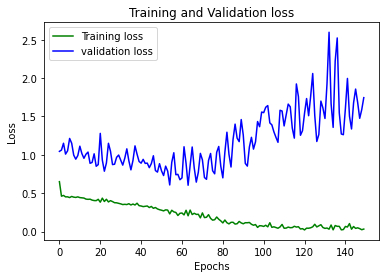

In [24]:
# Model loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,150)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

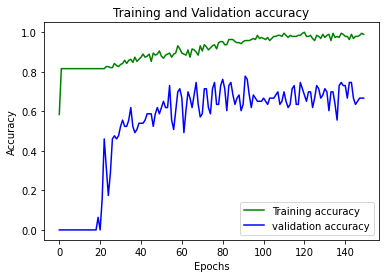

In [25]:
# Model accuracy
loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(0,150)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [26]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

In [27]:
# Print test accuracy
print('\n', 'Test accuracy:', score[1] * 100)


 Test accuracy: 66.66666865348816


In [28]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

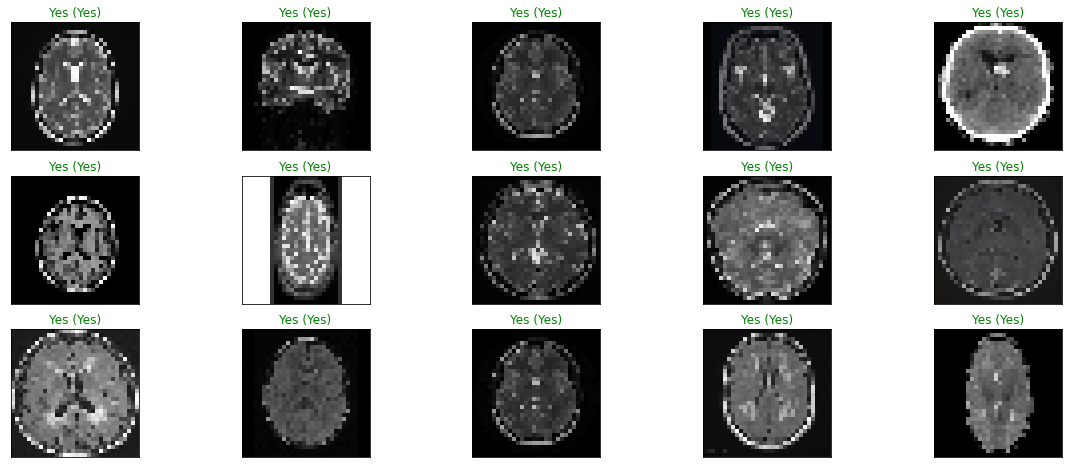

In [29]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()
